In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import pickle
import math
import networkx as nx
import numpy as np
import random
import time
import statistics
from itertools import chain 

In [4]:
G1 = nx.read_edgelist('/content/drive/MyDrive/ids_public1.txt')
node_count = len(list(G1.nodes()))
print('Число вершин:', node_count)
print('Число ребер:', len(list(G1.edges())))
print('Кластеризация: ', nx.transitivity(G1))
print('Кластерный коэффициент: ', nx.average_clustering(G1))
all_possible_count = int(node_count*(node_count - 1)/2)
print('Число всех возможных связей: ', all_possible_count)

Число вершин: 14906
Число ребер: 667417
Кластеризация:  0.15592911565947679
Кластерный коэффициент:  0.7201791742688693
Число всех возможных связей:  111086965


In [5]:
k_cores_size = []

for i in range(1, 25):
    k_cores_size.append(len(nx.k_core(G1, i).nodes()))

for i, n in enumerate(k_cores_size):
    print('Количество вершин в %s-core:' % (i + 1), n)

Количество вершин в 1-core: 14906
Количество вершин в 2-core: 14699
Количество вершин в 3-core: 14444
Количество вершин в 4-core: 14139
Количество вершин в 5-core: 13799
Количество вершин в 6-core: 13444
Количество вершин в 7-core: 13092
Количество вершин в 8-core: 12709
Количество вершин в 9-core: 12380
Количество вершин в 10-core: 12042
Количество вершин в 11-core: 11759
Количество вершин в 12-core: 11423
Количество вершин в 13-core: 11144
Количество вершин в 14-core: 10885
Количество вершин в 15-core: 10630
Количество вершин в 16-core: 10419
Количество вершин в 17-core: 10180
Количество вершин в 18-core: 9979
Количество вершин в 19-core: 9775
Количество вершин в 20-core: 9578
Количество вершин в 21-core: 9359
Количество вершин в 22-core: 9145
Количество вершин в 23-core: 8938
Количество вершин в 24-core: 8743


In [8]:
# Функция построения графика распределения степеней вершин в графе
def draw_nodes_degree_distribution(G):
    degree = dict(G.degree())
    degree_values = sorted(set(degree.values()))
    hist = [list(degree.values()).count(x) for x in degree_values]
    plt.plot(degree_values, hist, 'ro-')
    plt.xlabel("Количество связей")
    plt.ylabel("Количество вершин")
    plt.title("Распределение степеней графов")

In [9]:
# Получение коэффициентов схожести графа с моделью Малого мира
def small_world_similarity(G):
    L_s, C_s = [], []
    L = 4.228169
    C = 0.185179
    
    for i in range(1):
        connected_components_count = 10
        while connected_components_count != 1:
            generated_G = nx.watts_strogatz_graph(len(G), 9, 0.342)
            
            A = (generated_G.subgraph(c) for c in nx.connected_components(generated_G))
            A = list(A)
            
            connected_components_count = len(A)
            
        print(nx.number_of_edges(G), nx.number_of_edges(generated_G))
        
        L_s_ = nx.average_shortest_path_length(generated_G)
        C_s_ = nx.average_clustering(generated_G)
        print("L_s ", L_s_)
        print("C_s ", C_s_)
        L_s.append(L_s_)
        C_s.append(C_s_)
        draw_nodes_degree_distribution(generated_G)
    
    lambda_ = L / np.mean(L_s)
    gamma_ = C / np.mean(C_s)
    return generated_G

667417 59624
L_s  5.474353035029807
C_s  0.18590207182384844


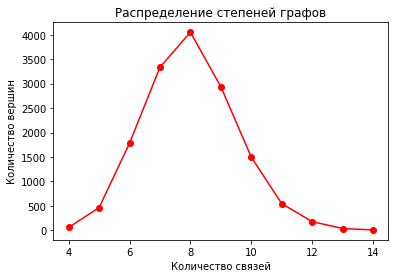

In [10]:
cmWorld = small_world_similarity(G1)

In [11]:
# Получение коэффициентов схожести графа с моделью Эрдоша-Реньи
def erdos_renyi_similarity(G):
    er_graph = nx.erdos_renyi_graph(len(G), p=node_count/all_possible_count)
    
#     plt.subplot(1, 2, 1)
    draw_nodes_degree_distribution(er_graph)
    L_connected_subgraphs = []
    connected_graphs = list((er_graph.subgraph(c) for c in nx.connected_components(er_graph)))
    for x in connected_graphs:
        path_length = nx.average_shortest_path_length(x)
        L_connected_subgraphs.append(path_length)
    
    L = np.mean(L_connected_subgraphs)
    C = nx.average_clustering(er_graph)
    print(L)
    print(C)
#     plt.subplot(1, 2, 2)
#     draw_nodes_degree_distribution(G)
    plt.show()

0.18400270938279412
0.00023704101256764615


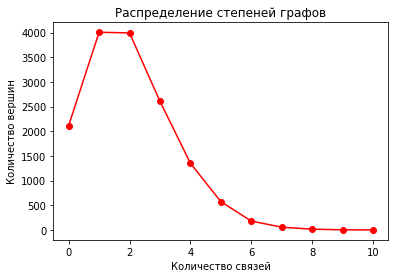

In [12]:
erdos_renyi_similarity(G1)

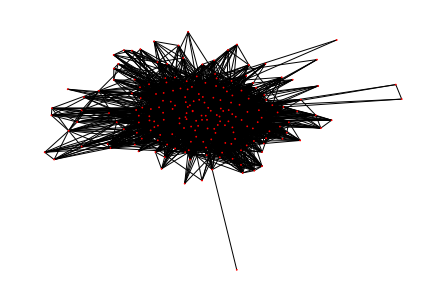

In [36]:
# G1_to_draw = G1
G1_to_draw = G1.subgraph(list(G1.nodes())[:200])
point_size = 0.6
point_color = 'red'
edge_size = 0.1
color_map = []
for node in G1_to_draw:
    color_map.append(point_color)
size_map = []
for i in nx.get_edge_attributes(G1_to_draw,'weight').values():
    size_map.append(edge_size)

nx.draw(G1_to_draw, node_size=point_size, node_color=color_map, width=size_map, pos=nx.spring_layout(G1_to_draw))

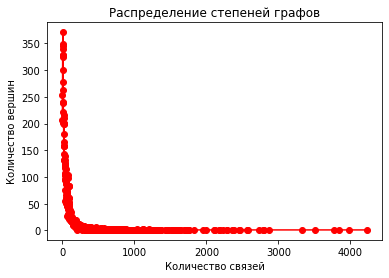

In [24]:
draw_nodes_degree_distribution(G1)

In [25]:
def barabasi_albert_similarity(G):
    ba_graph = nx.barabasi_albert_graph(len(G), 4)
    L = nx.average_shortest_path_length(ba_graph)
    C = nx.average_clustering(ba_graph)
    draw_nodes_degree_distribution(ba_graph)
    print('L=', L)
    print('C=', C)
    print('edge count', len(list(ba_graph.edges())))
    return ba_graph

L= 4.023403817000491
C= 0.004523289764136243
edge count 59608


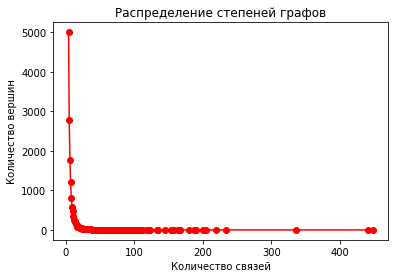

In [26]:
baGraph = barabasi_albert_similarity(G1)

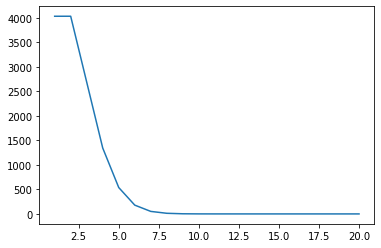

In [27]:
p = node_count/all_possible_count
ks = [x+1 for x in range(20)]
lamb = p * node_count
Potk = [math.pow(lamb,k)*math.exp(-lamb)/math.factorial(k)*node_count for k in ks]
plt.plot(ks, Potk)

In [28]:
L_connected_subgraphs = []
connected_graphs = list((G1.subgraph(c) for c in nx.connected_components(G1)))
for x in connected_graphs:
    print(len(x))
    if len(x) < 5:
        continue
    path_length = nx.average_shortest_path_length(x)
    L_connected_subgraphs.append(path_length)
    
L = np.mean(L_connected_subgraphs)
print(L)

14879


KeyboardInterrupt: ignored

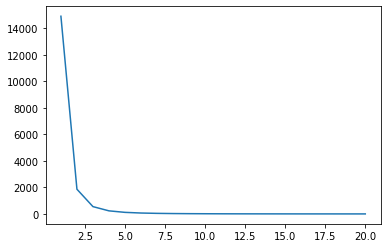

In [29]:
ks = [x+1 for x in range(20)]
Potk = [math.pow(k, -3)*node_count for k in ks]
plt.plot(ks, Potk)

In [30]:
def otnos_error(fact, approx):
    return abs(fact-approx)/fact

In [31]:
C = 0.185179
L = 4.228169
E = 16486

Cm = 0.18868
Lm = 4.69322
Em = 15288

Cb =0.015747
Lb = 3.57346
Eb = 15272

In [32]:
# baGraph, cmWorld
degreeBA = dict(baGraph.degree())
degree_valuesBA = sorted(set(degreeBA.values()))
histBA = [list(degreeBA.values()).count(x) for x in degree_valuesBA]

degreeSW = dict(cmWorld.degree())
degree_valuesSW = sorted(set(degreeSW.values()))
histSW = [list(degreeSW.values()).count(x) for x in degree_valuesSW]

degree = dict(G1.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]

sum = 0
for x in range(201):
    if x not in degree_values:
        continue
    if x not in degree_valuesBA:
        valueBA = 0
    else:
        indexBA = degree_valuesBA.index(x)
        valueBA = histBA[indexBA]
    value_real = hist[degree_values.index(x)]
    sum += otnos_error(value_real, valueBA)
Eba = sum / 200
print(Eba)



sum = 0
for x in range(201):
    if x not in degree_values:
        continue
    if x not in degree_valuesSW:
        valueSW = 0
    else:
        indexSW = degree_valuesSW.index(x)
        valueSW = histSW[indexSW]
    value_real = hist[degree_values.index(x)]
    sum += otnos_error(value_real, valueSW)
Esw = sum / 200
print(Esw)

1.046374960689251
1.1440162344154106


In [33]:
EEsw = otnos_error(C, Cm) + otnos_error(L, Lm) + otnos_error(E, Em) + Esw
EEba = otnos_error(C, Cb) + otnos_error(L, Lb) + otnos_error(E, Eb) + Eba
print('EEsw=', EEsw)
print('EEba=', EEba)

EEsw= 1.3455787284776108
EEba= 2.189821126442034


**-------------АНАЛИЗ ПОДПИСЧИКОВ ГРУППЫ И ИХ ДРУЗЕЙ-------------**

In [37]:
G2 = nx.read_edgelist('/content/drive/MyDrive/friends_inside_29842742.txt')
node_count = len(list(G2.nodes()))
print('Число вершин:', node_count)
print('Число ребер:', len(list(G2.edges())))
print('Кластеризация: ', nx.transitivity(G2))
print('Кластерный коэффициент: ', nx.average_clustering(G2))
all_possible_count = int(node_count*(node_count - 1)/2)
print('Число всех возможных связей: ', all_possible_count)

Число вершин: 14767
Число ребер: 15063
Кластеризация:  0.011235437675553713
Кластерный коэффициент:  0.01613295677107348
Число всех возможных связей:  109024761


In [38]:
k_cores_size = []

for i in range(1, 25):
    k_cores_size.append(len(nx.k_core(G2, i).nodes()))

for i, n in enumerate(k_cores_size):
    print('Количество вершин в %s-core:' % (i + 1), n)

Количество вершин в 1-core: 14767
Количество вершин в 2-core: 2175
Количество вершин в 3-core: 308
Количество вершин в 4-core: 67
Количество вершин в 5-core: 22
Количество вершин в 6-core: 12
Количество вершин в 7-core: 0
Количество вершин в 8-core: 0
Количество вершин в 9-core: 0
Количество вершин в 10-core: 0
Количество вершин в 11-core: 0
Количество вершин в 12-core: 0
Количество вершин в 13-core: 0
Количество вершин в 14-core: 0
Количество вершин в 15-core: 0
Количество вершин в 16-core: 0
Количество вершин в 17-core: 0
Количество вершин в 18-core: 0
Количество вершин в 19-core: 0
Количество вершин в 20-core: 0
Количество вершин в 21-core: 0
Количество вершин в 22-core: 0
Количество вершин в 23-core: 0
Количество вершин в 24-core: 0


15063 59068
L_s  5.478160497870754
C_s  0.18913085439800492


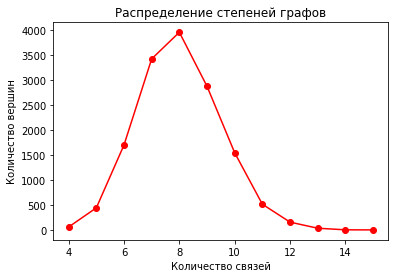

In [39]:
cmWorld2 = small_world_similarity(G2)

0.1985892093291506
0.0


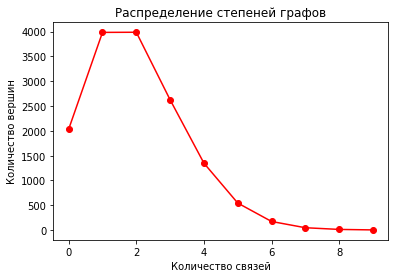

In [40]:
erdos_renyi_similarity(G2)

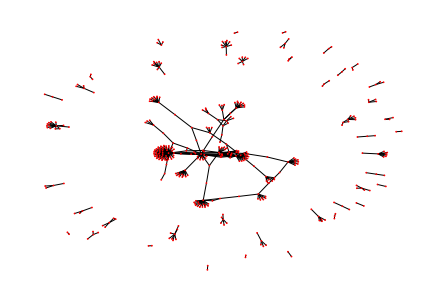

In [51]:
G2_to_draw = G2.subgraph(list(G2.nodes())[:400])
point_size = 0.6
point_color = 'red'
edge_size = 0.1
color_map = []
for node in G2_to_draw:
    color_map.append(point_color)
size_map = []
for i in nx.get_edge_attributes(G2_to_draw,'weight').values():
    size_map.append(edge_size)

nx.draw(G2_to_draw, node_size=point_size, node_color=color_map, width=size_map, pos=nx.spring_layout(G2_to_draw))

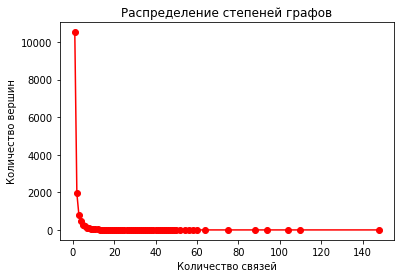

In [48]:
draw_nodes_degree_distribution(G2)

L= 4.02262060450653
C= 0.004391353126828201
edge count 59052


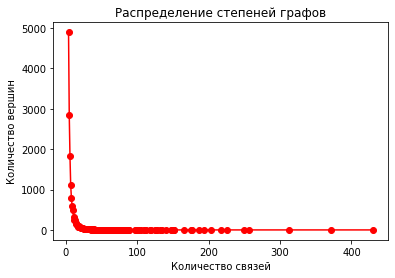

In [49]:
baGraph = barabasi_albert_similarity(G2)